# Situación legal

https://chequeado.com/ultimas-noticias/martin-casares-por-primera-vez-en-la-historia-en-2017-el-porcentaje-de-condenados-supero-al-de-procesados/

In [61]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append('../config')
from mpl_settings_v3 import *

In [54]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
temporal_data_file = '../datasets/sneep_2002_2017_diplodatos.zip'
temp_data = pd.read_csv(temporal_data_file, compression='zip', index_col=0)

/home/lucia/.anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22,41,42,43,44,45,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pivot = temp_data.dropna(subset=['situacion_legal_descripcion']).pivot_table(index='anio_censo', 
                                                                             columns='situacion_legal_descripcion', 
                                                                             values='provincia_descripcion', aggfunc='count')

pivot

situacion_legal_descripcion,Condenado,Contraventor,Inimputable,Otra situación,Procesado
anio_censo,,,,,
2002,17756.0,4.0,424.0,308.0,26477.0
2003,16803.0,12.0,477.0,143.0,25117.0
2004,21054.0,9.0,674.0,249.0,31043.0
2005,18906.0,2.0,353.0,196.0,24232.0
2006,20537.0,3.0,583.0,253.0,29052.0
2007,20196.0,1.0,590.0,221.0,29972.0
2008,21333.0,17.0,552.0,156.0,31389.0
2009,23590.0,29.0,514.0,216.0,30409.0
2010,27320.0,85.0,509.0,171.0,30832.0


In [15]:
condenados = pivot['Condenado']
procesados = pivot['Procesado']

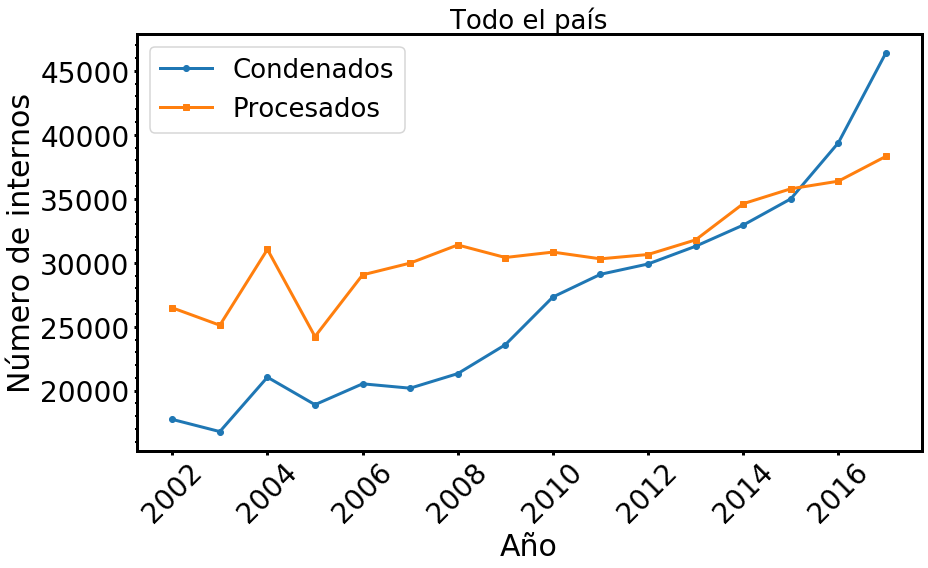

In [64]:
fig, ax = plt.subplots(figsize=(13, 8), ncols=1)
ax.plot(np.asarray(condenados.index), condenados.values, '-o', label='Condenados')
ax.plot(np.asarray(procesados.index), procesados.values, '-s', label='Procesados')
ax.set_title('Todo el país', fontsize=26)
ax.set_xlabel('Año')
ax.set_ylabel('Número de internos')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

In [50]:
mask = temp_data['anio_censo'] == 2017
temp_data[mask]["provincia_descripcion"].value_counts()

Buenos Aires              43317
Córdoba                    8387
Santa Fe                   4931
Mendoza                    4605
Salta                      3593
Entre Rios                 2158
Chaco                      1931
Ciudad de Buenos Aires     1819
Misiones                   1696
Río Negro                  1443
San Juan                   1349
Tucumán                    1275
Jujuy                      1132
Corrientes                 1127
Chubut                     1070
Neuquén                     938
La Pampa                    826
Formosa                     738
San Luis                    699
Santiago del Estero         607
Catamarca                   579
Santa Cruz                  507
La Rioja                    379
Tierra del Fuego            177
Name: provincia_descripcion, dtype: int64

In [51]:
temp_data[mask]["provincia_descripcion"].value_counts().sum()

85283

## Buenos Aires

In [4]:
mask1 = temp_data['provincia_descripcion'] == 'Buenos Aires'
pivot_ba = temp_data[mask1].dropna(subset=['situacion_legal_descripcion']).pivot_table(index='anio_censo', 
                                                                                     columns='situacion_legal_descripcion', 
                                                                                     values='provincia_descripcion', aggfunc='count')

In [ ]:
condenados_ba = pivot_ba['Condenado']
procesados_ba = pivot_ba['Procesado']

In [ ]:
fig, axes = plt.subplots(figsize=(24, 8), ncols=2)
ax = axes[0]
ax.plot(np.asarray(condenados_cba.index), condenados_cba.values, '-o', label='Condenados')
ax.plot(np.asarray(procesados_cba.index), procesados_cba.values, '-s', label='Procesados')
ax.set_title('Córdoba', fontsize=26)
ax.set_xlabel('Año')
ax.set_ylabel('Número de internos')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

ax = axes[1]
ax.plot(np.asarray(condenados_fed.index), condenados_fed.values, '-o', label='Condenados')
ax.plot(np.asarray(procesados_fed.index), procesados_fed.values, '-s', label='Procesados')
ax.set_title('Establecimientos Federales', fontsize=26)
ax.set_xlabel('Año')
ax.set_ylabel('Número de internos')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

## Córdoba y Establecimientos Federales

In [6]:
mask3 = temp_data['jurisdiccion_descripcion'] == 'FEDERAL'
pivot_fed = temp_data[mask3].dropna(subset=['situacion_legal_descripcion']).pivot_table(index='anio_censo', 
                                                                                     columns='situacion_legal_descripcion', 
                                                                                     values='provincia_descripcion', aggfunc='count')

In [ ]:
condenados_fed = pivot_fed['Condenado']
procesados_fed = pivot_fed['Procesado']

In [14]:
mask2 = temp_data['provincia_descripcion'] == 'Córdoba'
pivot_cba = temp_data[mask2].dropna(subset=['situacion_legal_descripcion']).pivot_table(index='anio_censo', 
                                                                                     columns='situacion_legal_descripcion', 
                                                                                     values='provincia_descripcion', aggfunc='count')

In [ ]:
condenados_cba = pivot_cba['Condenado']
procesados_cba = pivot_cba['Procesado']

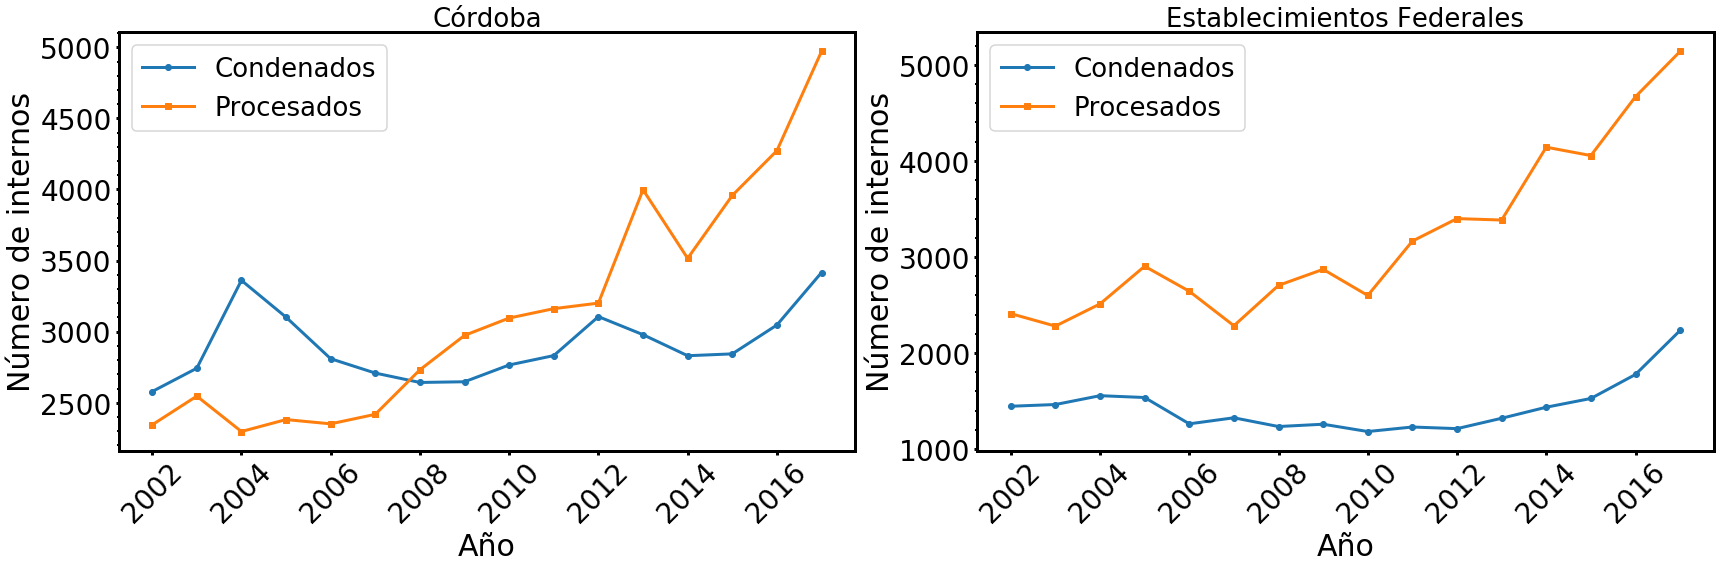

In [62]:
fig, axes = plt.subplots(figsize=(24, 8), ncols=2)
ax = axes[0]
ax.plot(np.asarray(condenados_cba.index), condenados_cba.values, '-o', label='Condenados')
ax.plot(np.asarray(procesados_cba.index), procesados_cba.values, '-s', label='Procesados')
ax.set_title('Córdoba', fontsize=26)
ax.set_xlabel('Año')
ax.set_ylabel('Número de internos')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

ax = axes[1]
ax.plot(np.asarray(condenados_fed.index), condenados_fed.values, '-o', label='Condenados')
ax.plot(np.asarray(procesados_fed.index), procesados_fed.values, '-s', label='Procesados')
ax.set_title('Establecimientos Federales', fontsize=26)
ax.set_xlabel('Año')
ax.set_ylabel('Número de internos')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

## Todas las provincias menos Buenos Aires

In [45]:
mask4 = ~(temp_data['provincia_descripcion'] == 'Buenos Aires')
pivot_sin_ba = temp_data[mask4].dropna(subset=['situacion_legal_descripcion']).pivot_table(index='anio_censo', 
                                                                                     columns='situacion_legal_descripcion', 
                                                                                     values='provincia_descripcion', aggfunc='count')

In [46]:
condenados_sin_ba = pivot_sin_ba['Condenado']
procesados_sin_ba = pivot_sin_ba['Procesado']

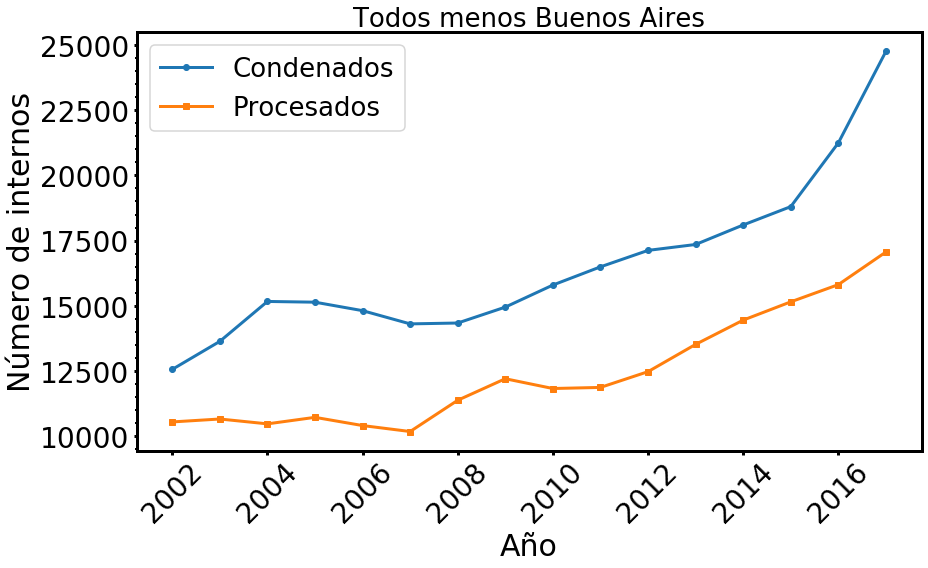

In [63]:
fig, ax = plt.subplots(figsize=(13, 8), ncols=1)
ax.plot(np.asarray(condenados_sin_ba.index), condenados_sin_ba.values, '-o', label='Condenados')
ax.plot(np.asarray(procesados_sin_ba.index), procesados_sin_ba.values, '-s', label='Procesados')
ax.set_title('Todos menos Buenos Aires', fontsize=26)
ax.set_xlabel('Año')
ax.set_ylabel('Número de internos')
ax.set_xticks(range(2002, 2018, 2))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

## Otras provincias